In [142]:
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
from scipy import optimize 

### Intervalo de estados

In [143]:
interval_estate = (0, 10)

### Funcion a minimizar

In [144]:
def f(x):
    #return 0.2 + x**2 + x**2 - 0.1*math.cos(6.0*3.1415*x) - 0.1*math.cos(6.0*3.1415*x)
    return x ** 2

In [145]:
def random_start():
    a, b = interval_estate
    return a + (b - a) * rand.random_sample()

In [146]:
def neighbour(x):
    amplitude = (max(interval_estate) - min(interval_estate)) * 1 / 10
    delta = (-amplitude/2.) + amplitude * rand.random_sample()
    a, b = interval_estate
    return max(min(x + delta, b), a)

In [147]:
def probability(cost, new_cost, temperature):
    if new_cost < cost:
        return 1
    else:
        p = np.exp(- (new_cost - cost) / temperature)
        return p

In [148]:
def temperature(c, temp):
    return max(0.01, min(temp, temp - c))

## Python Annealing Code

In [218]:
def annealing(random_start,temp, maxsteps=1000):
    state = random_start()
    cost = f(state)
    temp_list=[]
    states, costs = [state], [cost]
    for step in range(maxsteps):
        c = step / float(maxsteps)
        T = temperature(c, temp)
        new_state = neighbour(state)
        new_cost = f(new_state)
        temp_list += [T]
        #print("Reiteracion #"+str(step)+" : \n     Temperatura = "+str(T)+", \n     Estado = "+str(state)+", \n     Nuevo estado = "+str(new_state))
        if probability(cost, new_cost, T) > rand.random():
            state, cost = new_state, new_cost
            states.append(state)
            costs.append(cost)
    return state, f(state), states, temp_list

In [308]:
mpl.rcParams['figure.figsize'] = (15, 4)
def plot1(states, temp_list):
    plt.figure()
    plt.subplot(121)
    plt.plot(states, 'r')
    plt.title("Evolucion de los estados con simulated annealing", fontsize=14)
    plt.ylabel('Estados')
    plt.xlabel('Pasos o iteraciones')
    plt.show()

In [309]:
def plot2(states, temp_list):
    plt.figure()
    plt.subplot(121)
    plt.plot(temp_list, 'g')
    plt.title("Descenso de la temperatura para garantizar la convergencia al minimo global", fontsize=14)
    plt.ylabel('Temperatura')
    plt.xlabel('Pasos o iteraciones')
    plt.show()

In [312]:
state, c, states, temp_list = annealing(random_start, 4, maxsteps=1000)

### Convergencia al mínimo global

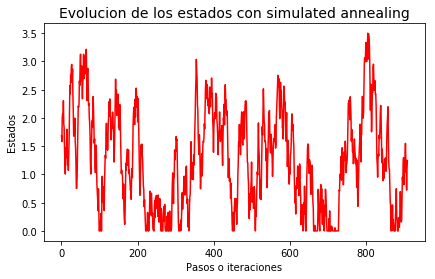

In [316]:
plot1(states, temp_list)

### Descenso de la temperatura

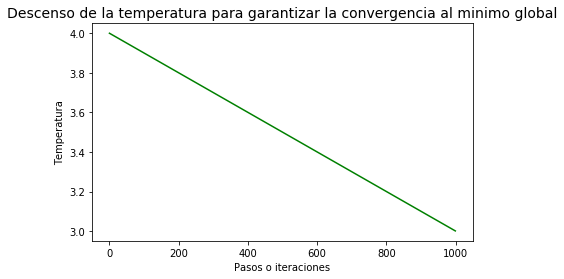

In [315]:
plot2(states, temp_list)